1). Get the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
#import os
#os.chdir('/Users/smarcos/Downloads/click_prediction/')


In [3]:
df = pd.read_csv('ad_data.csv')

In [4]:
df.head(5)

,click_status,AMP_timestamp,Query Term,IP Address,User Agent,Cost Per Click,Conversions
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,$ .28,0
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,$ .90,0
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,$ .17,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10103 entries, 0 to 10102
Data columns (total 7 columns):
click_status       10103 non-null int64
AMP_timestamp      10103 non-null object
Query Term         10103 non-null object
IP Address         10103 non-null object
User Agent         10103 non-null object
Cost Per Click     10103 non-null object
Conversions        10103 non-null int64
dtypes: int64(2), object(5)
memory usage: 552.6+ KB


2). Data Cleaning: 
Check missing values and column names
Clean click_status
Clean AMP_timestamp
Clean query_terms
Clean user_agent
Clean cost_per_click

In [6]:
# Check missing values 
df[df.isnull().any(axis=1)]

,click_status,AMP_timestamp,Query Term,IP Address,User Agent,Cost Per Click,Conversions


In [7]:
#check column names
df.columns

Index(['click_status', 'AMP_timestamp', 'Query Term ', 'IP Address',
       'User Agent', 'Cost Per Click ', 'Conversions'],
      dtype='object')

In [8]:
# rename columns
df.columns = ['click_status','AMP_timestamp','query_term','IP_address','user_agent','cost_per_click','conversions']


In [9]:
df.head(5)

,click_status,AMP_timestamp,query_term,IP_address,user_agent,cost_per_click,conversions
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,$ .28,0
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,$ .90,0
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,$ .17,0


## Add Country & City 

### Install packages

In [54]:
# ! pip install python-geoip
# ! pip install python-geoip-geolite2
# ! pip install pygeoip

### Install IP data 

In [55]:
# download these files

#! wget "http://geolite.maxmind.com/download/geoip/database/GeoLiteCountry/GeoIP.dat.gz"
#! wget "http://geolite.maxmind.com/download/geoip/database/GeoLiteCountry/GeoIP.dat.gz"

In [10]:
IPs = df['IP_address'].tolist()

In [11]:
IPs[0]

'2.118.171.21'

In [12]:
IP_country = []

import pygeoip
GEOIP = pygeoip.GeoIP("GeoIP.dat", pygeoip.MEMORY_CACHE)

for i in range(len(IPs)):
    IP_country.append(GEOIP.country_name_by_addr(IPs[i]))

In [13]:
ip_city_dict = []
import pygeoip
GEOIP = pygeoip.GeoIP("GeoLiteCity.dat", pygeoip.MEMORY_CACHE)

for i in range(len(IPs)):
    ip_city_dict.append(GEOIP.record_by_addr(IPs[i]))

city_ip = []
for i in ip_city_dict:
    if i is None:
        city_ip.append("Unknown")
    else:
        city_ip.append(i['city'])

In [14]:
df['country'] = IP_country
df['city'] = city_ip
df["city"].fillna("Unknown", inplace=True)
df['country'].replace("", 'Unknown',inplace=True)

In [15]:
df.head()

,click_status,AMP_timestamp,query_term,IP_address,user_agent,cost_per_click,conversions,country,city
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,$ .28,0,Italy,Unknown
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0,Unknown,Unknown
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0,Unknown,Unknown
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,$ .90,0,Japan,Nagoya
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,$ .17,0,Australia,Sydney


In [16]:
#get features
import re
user_data =df['user_agent'].tolist()

features = []
for i in user_data:
    features.append(re.sub(r'[^ a-zA-Z]',"",i).split()[1])
df['features'] = features 

In [17]:
len(features)

10103

In [18]:
df.head()

,click_status,AMP_timestamp,query_term,IP_address,user_agent,cost_per_click,conversions,country,city,features
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,$ .28,0,Italy,Unknown,iPad
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0,Unknown,Unknown,Windows
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,$ .17,0,Unknown,Unknown,Windows
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,$ .90,0,Japan,Nagoya,Windows
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,$ .17,0,Australia,Sydney,compatible


In [19]:
#click_status: click_status 1 = valid click, 0 = invalidated click
df.click_status = df.click_status.map(lambda x: 1 if x == 1 else 0)

3). Extract date and hour


In [20]:
#extract date
df['date'] = df.AMP_timestamp.map(lambda x: x[:7])

#extract hour
df['hour'] = df.AMP_timestamp.map(lambda x: int(x[8:11]))

In [21]:
#check the hours range
print ('max hour: ', df['hour'].max())
print ('min hour: ', df['hour'].min())

max hour:  15
min hour:  11


In [22]:
df.describe()

,click_status,conversions,hour
count,10103.000000,10103.000000,10103.000000
mean,0.862417,0.255766,12.945363
std,0.344479,0.719603,1.320379
min,0.000000,0.000000,11.000000
25%,1.000000,0.000000,12.000000
50%,1.000000,0.000000,13.000000
75%,1.000000,0.000000,14.000000
max,1.000000,13.000000,15.000000


In [23]:
#max hour:  15
#min hour:  11

4). Query Terms


In [24]:
df.query_term.value_counts().head(10)

["car title loans","loan quotes","car financing"]                                  317
["car title loans","loan quotes","car finance calculator"]                         313
["car title loans","loan quotes","new car payment"]                                290
["Byethost"]                                                                       268
["edu online info","degree programs","online degree program"]                      176
["Naver.com"]                                                                      111
["ron"]                                                                            106
["apartments for rent vancouver craigslist","craigslist used cars","personals"]     88
["force download","youtuby","youtube org"]                                          87
["apricot complex"]                                                                 85
Name: query_term, dtype: int64

In [25]:
'''
- most of the queries that made it to the top are related to cars 

'''

'\n- most of the queries that made it to the top are related to cars \n\n'

In [26]:
#store query terms as a list
df['query_term_list'] = df.query_term.map(lambda x: x.strip('[').strip(']').replace('"','').split(','))

In [27]:
#length of the query terms list
df['len_query_term_list'] = df['query_term_list'].map(lambda x: len(x))


In [28]:
#how many queries by number of terms per query 
df['len_query_term_list'].value_counts()

3    4908
1    4016
2     826
4     139
5     122
6      91
7       1
Name: len_query_term_list, dtype: int64

5). CPC & converstions

In [29]:
df.cost_per_click = df.cost_per_click.map(lambda x: float(x.strip('$ ')))

In [30]:
df.conversions.value_counts()

0     8719
2      814
1      431
3       68
4       56
6        6
5        6
9        2
13       1
Name: conversions, dtype: int64

6). Doing some analysis

6.1.). High level trends


In [31]:
#cleaning click_status
df_1 = df[df.click_status == 1]
df_0 = df[df.click_status == 0]

In [32]:
#Ratio: Valid Click
len(df_1) / float(len(df))


0.8624171038305454

-- Valid Click Ratio is 86.2%

In [33]:
#Avg: CPC/ Valid clicks
df_1.cost_per_click.mean()


0.3773258349592622

-- Avg cost per click (CPC) / valid clicks is .37

In [34]:
#total spending/ valid clicks
df_1.cost_per_click.sum()


3287.64

-- the total spending / valid clicks is 3,287

In [35]:
#Conversion rate / valid clicks
len(df[df.conversions!=0])/float(len(df_1))


0.1588431079995409

-- Conversion rate is 15.8%

6.2.). Analysis for clicks with status = 1:


In [36]:
#Top Spending Query Terms and avg CPC for clicks with status =1
qt_table = pd.pivot_table(df_1,index='query_term',values=['click_status','cost_per_click'],aggfunc=[np.sum]).sort_values(by=('sum','cost_per_click'),ascending=False)
qt_table[('avg','cost_per_click')] = qt_table[('sum','cost_per_click')] / qt_table[('sum','click_status')]
qt_table.head(10)

sum  \
                                                   click_status   
query_term                                                        
["car title loans","loan quotes","car financing"]           295   
["car title loans","loan quotes","car finance c...          296   
["car title loans","loan quotes","new car payme...          270   
["apartments for rent vancouver craigslist","cr...           81   
["turbo tax"]                                                38   
["sprint wireless","sprint mobile","sprint","sp...           27   
["edu online info","degree programs","online de...          174   
["autotrader","autotrade","car website"]                     33   
["turbo tax","turbotax","intuit turbotax"]                    4   
["Byethost"]                                                191   

                                                                   \
                                                   cost_per_click   
query_term                                                          
["car title loans","loan quotes","car financing"]          356.30   
["car title loans","loan quotes","car finance c...         354.83   
["car title loans","loan quotes","new car payme...         337.67   
["apartments for rent vancouver craigslist","cr...          97.11   
["turbo tax"]                                               90.42   
["sprint wireless","sprint mobile","sprint","sp...          61.54   
["edu online info","degree programs","online de...          38.19   
["autotrader","autotrade","car website"]                    36.04   
["turbo tax","turbotax","intuit turbotax"]                  35.51   
["Byethost"]                                                32.47   

                                                              avg  
                                                   cost_per_click  
query_term                                                         
["car title loans","loan quotes","car financing"]        1.207797  
["car title loans","loan quotes","car finance c...       1.198750  
["car title loans","loan quotes","new car payme...       1.250630  
["apartments for rent vancouver craigslist","cr...       1.198889  
["turbo tax"]                                            2.379474  
["sprint wireless","sprint mobile","sprint","sp...       2.279259  
["edu online info","degree programs","online de...       0.219483  
["autotrader","autotrade","car website"]                 1.092121  
["turbo tax","turbotax","intuit turbotax"]               8.877500  
["Byethost"]                                             0.170000

In [37]:
qt_table.columns = ['valid_clicks','total_spending','avg_cpc']

In [38]:
#get buckets for data visualization
bins = [0, 50, 100, 150, 200, 250, 300]
group_names = ['<50 Clicks', '50-99 Clicks', '100-149 Clicks', '150-199 Clicks','200-249 Clicks','250+ Clicks']
qt_table['click_bucket'] = pd.cut(qt_table['valid_clicks'], bins, labels=group_names)

In [39]:
qt_table.valid_clicks.mean()


3.6857021996615904

In [40]:
qt_table.head()

,valid_clicks,total_spending,avg_cpc,click_bucket
query_term,,,,
"[""car title loans"",""loan quotes"",""car financing""]",295,356.30,1.207797,250+ Clicks
"[""car title loans"",""loan quotes"",""car finance calculator""]",296,354.83,1.198750,250+ Clicks
"[""car title loans"",""loan quotes"",""new car payment""]",270,337.67,1.250630,250+ Clicks
"[""apartments for rent vancouver craigslist"",""craigslist used cars"",""personals""]",81,97.11,1.198889,50-99 Clicks
"[""turbo tax""]",38,90.42,2.379474,<50 Clicks


In [41]:
#qt_table.head(20)['valid_clicks']

In [42]:
# Identify the top converting IP addresses
df_1[df.conversions != 0].IP_address.value_counts().to_frame().head(10)

/home/aurobindo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,IP_address
254.48.209.110,5
99.58.152.185,5
173.145.41.71,4
40.42.200.39,4
221.20.148.233,4
1.83.232.46,4
217.149.200.112,3
214.170.202.50,3
254.126.184.83,3
66.163.74.30,3


-- 100.00% of query terms had 1 or more valid clicks
-- 12.52% of query terms had 5 or more valid clicks
-- 5.88% of query terms had 10 or more valid clicks
-- 1.27% of query terms had 50 or more valid clicks
-- 0.21% of query terms had 100 or more valid clicks
-- 0.13% of query terms had 200 or more valid clicks


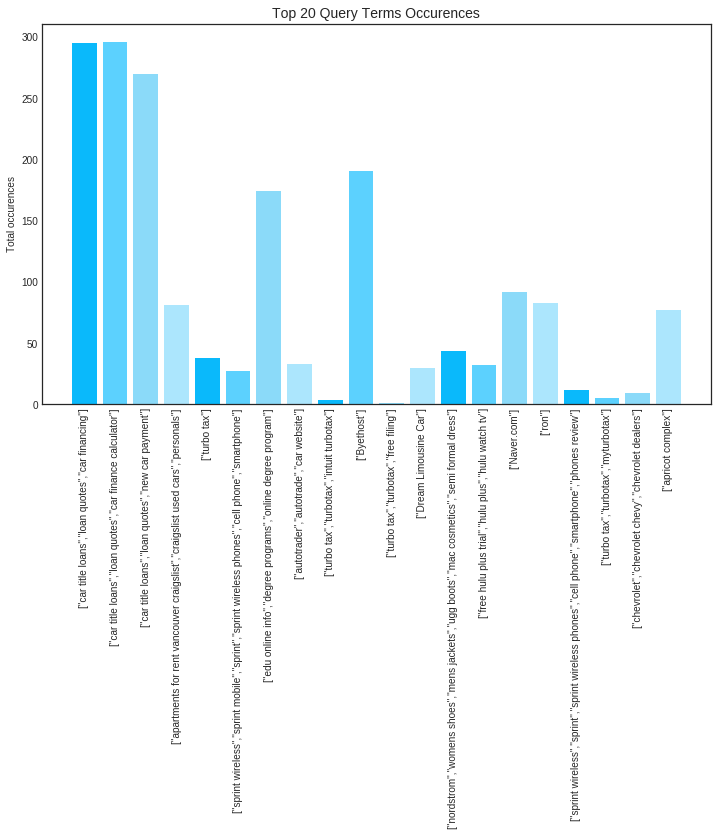

In [43]:
#Query terms table
fig,ax = plt.subplots(figsize=(12, 7))
bcolor = ["#0AB9FB", "#5CD1FE","#8BDAF9", "#ACE6FD"]

plt.bar(x = qt_table.head(20).index, height = qt_table.head(20)['valid_clicks'],color=bcolor)

plt.ylabel('Total occurences')
plt.title('Top 20 Query Terms Occurences', fontsize=14);
plt.xticks(rotation = 'vertical')

total_num = float(len(qt_table))
for i in [1,5,10, 50, 100, 200]:
    print ('-- {:.2f}% of query terms had {} or more valid clicks'.format( (qt_table['valid_clicks'][qt_table['valid_clicks']>=i].count()) / total_num *100,i))


6.2). For IP addresses with > 1 click:


In [44]:
ip_list = df.IP_address.value_counts()[df.IP_address.value_counts() >1].to_frame().index


In [45]:
df_ip = df[df.IP_address.isin(ip_list)]

In [46]:
# Provide a breakdown on invalid and valid clicks. Include steps taken to conduct analysis
ip_status_table = df_ip.click_status.value_counts().to_frame()
ip_status_table['percentage'] = ip_status_table.click_status / ip_status_table.click_status.sum()
ip_status_table




,click_status,percentage
1,2453,0.81279
0,565,0.18721


In [47]:
# Provide a breakdown on whether these users send the same query term for each click
ip_query_table = pd.pivot_table(df_ip,index=['IP_address','query_term'],values='click_status',aggfunc=[len]).reset_index()
ip_query_table.head()

,IP_address,query_term,len
,,,click_status
0,0.38.12.224,"[""youtube"",""youtuby"",""r youtube""]",1
1,0.38.12.224,"[""youtube"",""youtuby"",""youtube org""]",2
2,0.53.181.217,"[""Nyanko Seek""]",3
3,0.71.103.209,"[""meet girls"",""dating girls""]",4
4,0.73.240.6,"[""Badidu""]",2


In [48]:
ip_query_table_2 = pd.pivot_table(ip_query_table,index=['IP_address'],values='query_term',aggfunc=[len]).reset_index()
ip_query_table_2.columns = ['IP_address','unique_query_terms']


/home/aurobindo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [49]:
ip_unique_query = ip_query_table_2.unique_query_terms.value_counts().to_frame()
ip_unique_query['percentage'] = ip_unique_query.unique_query_terms / ip_unique_query.unique_query_terms.sum()
ip_unique_query

,unique_query_terms,percentage
1,736,0.623201
2,379,0.320914
3,50,0.042337
4,13,0.011008
5,3,0.002540


In [50]:
# Identify any shared attributes for this pool of users (if any)
# Create ip_clicks_status: 1 = IP addresses with > 1 click, 0 = IP addresses with 1 click
df['ip_clicks_status'] = df.IP_address.map(lambda x: 1 if x in ip_list else 0)


In [51]:
df['ip_clicks_status'].sum() / float(len(df['ip_clicks_status']))


0.2987231515391468

In [52]:
df.to_csv('cleaned_data.csv')

In [53]:
df.head()

,click_status,AMP_timestamp,query_term,IP_address,user_agent,cost_per_click,conversions,country,city,features,date,hour,query_term_list,len_query_term_list,ip_clicks_status
0,1,29/01/15 11:00,"[""michael kors"",""michael michael kors""]",2.118.171.21,Mozilla/5.0 (iPad; CPU OS 8_1 like Mac OS X) A...,0.28,0,Italy,Unknown,iPad,29/01/1,11,"[michael kors, michael michael kors]",2,0
1,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,0.17,0,Unknown,Unknown,Windows,29/01/1,11,"[meet girls, dating girls]",2,1
2,1,29/01/15 11:00,"[""meet girls"",""dating girls""]",0.82.173.102,Mozilla/5.0 (Windows NT 5.1; rv:35.0) Gecko/20...,0.17,0,Unknown,Unknown,Windows,29/01/1,11,"[meet girls, dating girls]",2,1
3,1,29/01/15 11:00,"[""credit report"",""credit karma"",""free online c...",219.32.49.92,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,0.90,0,Japan,Nagoya,Windows,29/01/1,11,"[credit report, credit karma, free online cred...",3,0
4,1,29/01/15 11:00,"[""Byethost""]",13.54.12.142,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,0.17,0,Australia,Sydney,compatible,29/01/1,11,[Byethost],1,1


In [56]:
df['query_term']

0                  ["michael kors","michael michael kors"]
1                            ["meet girls","dating girls"]
2                            ["meet girls","dating girls"]
3        ["credit report","credit karma","free online c...
4                                             ["Byethost"]
5        ["online education games for kids","games for ...
6        ["performance parts","auto body parts","racing...
7                                            ["game spot"]
8            ["pediatric job","F Craigslist","online job"]
9                   ["yahoo!","yahoo","yahoo my homepage"]
10       ["black friday deals","promo code macy","macy ...
11                                             ["Cyworld"]
12                                              ["Gujjar"]
13                                              ["Gujjar"]
14       ["To 3GP","Online Video Converter","video prod...
15                                              ["Faisal"]
16                                    ["Kick Ass Torrent